In [2]:
import matplotlib.pyplot as plt

from copy import copy
from math import copysign
from pathlib import Path
from sys import path
from itertools import accumulate

import numpy as np

from ruckig import InputParameter, OutputParameter, Result, Ruckig, Trajectory

In [343]:
# Create instances: the Ruckig OTG as well as input and output parameters
cycle_time = 0.01
ruckig_generator = Ruckig(2, cycle_time)  # DoFs, control cycle
def traj_from_input(inp):
    ruckig_generator.reset()
    t= Trajectory(2)
    res = ruckig_generator.calculate(inp, t)
    #print(res)
    return t

In [365]:
inp = InputParameter(2)
inp.max_velocity = [0.1, 0.3]
inp.max_acceleration = [1.0, 1.0]
inp.max_jerk = [8.0, 8.0]

In [368]:
def pluck_for_kp(keypoint, before, after):
    inp.current_position = before
    inp.current_velocity = [0.0, 0.0]
    inp.current_acceleration = [0.0, 0.0]
    inp.target_position = keypoint[0]
    inp.target_velocity = keypoint[1]
    inp.target_acceleration = [0.0,0.0]
    t= traj_from_input(inp)
    kp= np.array(t.at_time(t.duration)).T
    inp.current_position = kp[:,0]
    inp.current_velocity = kp[:,1]
    inp.current_acceleration = kp[:,2]
    inp.target_position = after
    inp.target_velocity = [0.0,0.0]
    inp.target_acceleration = [0.0,0.0]
    t2= traj_from_input(inp)

    n_wp= int((t.duration+t2.duration)/cycle_time)
    kp_idx= int((t.duration)/cycle_time)
    T= np.linspace(0.0, t.duration+t2.duration, n_wp)
    Y= np.zeros((n_wp, 2, 3))

    for i in range(0, kp_idx):
        Y[i,:,:] = np.array(t.at_time(T[i])).T
    for i in range(kp_idx, n_wp):
        Y[i,:,:] = np.array(t2.at_time(T[i]-t.duration)).T
    return T,Y

(92, 2, 3)


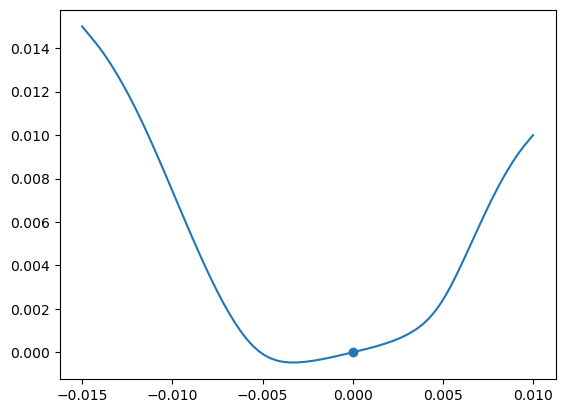

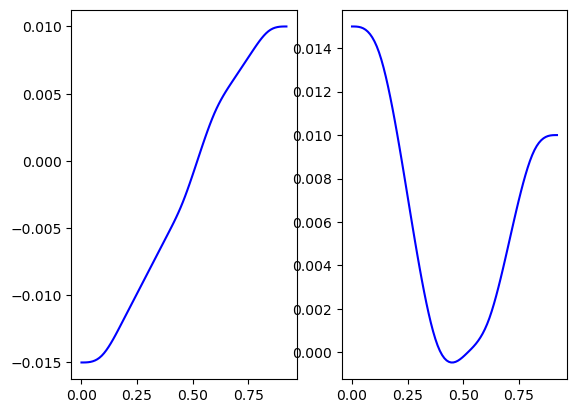

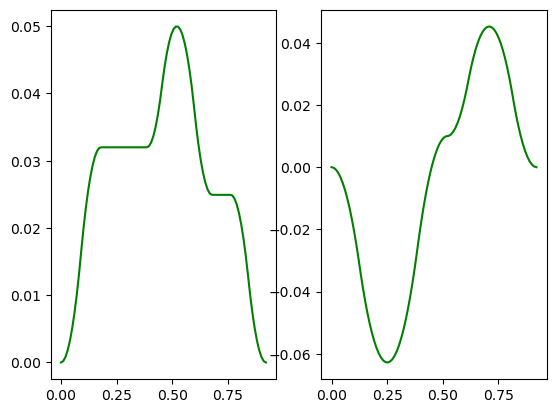

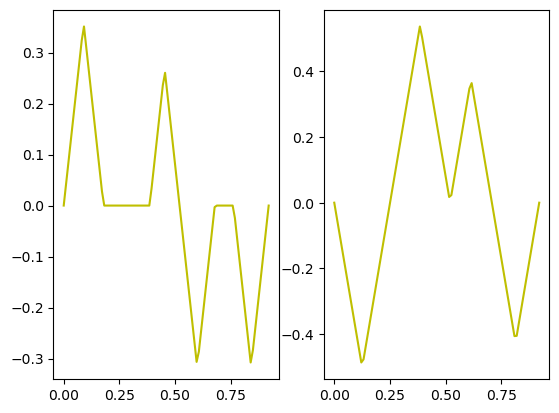

In [371]:
inp = InputParameter(2)
inp.max_velocity = [0.1, 0.3]
inp.max_acceleration = [1.0, 1.0]
inp.max_jerk = [4.0, 4.0]

before = (-0.015, 0.015)
after = (0.01, 0.01)
keypoint = ((0.0,0.0),(0.05,0.01))

T,Y= pluck_for_kp(keypoint, before= before, after= after)

print(Y.shape)
plt.plot(Y[:,0,0], Y[:,1,0]); plt.scatter([keypoint[0][0]], [keypoint[0][1]]);

plt.figure()
for j in [0,1]:
    plt.subplot(1,2,j+1)
    plt.plot(T, Y[:,j,0], color='b')
plt.figure()
for j in [0,1]:
    plt.subplot(1,2,j+1)
    plt.plot(T, Y[:,j,1], color='g')
plt.figure()
for j in [0,1]:
    plt.subplot(1,2,j+1)
    plt.plot(T, Y[:,j,2], color='y')